# Generating mixed-model data

So far, the tutorials have been dealing with **GaussianDistribution** only.
But `pyMultiFit` has a number of built-in distributions that can be leveraged to generate a data with mixture of models.

For example, let's say we want to simulate a data that not only has **Gaussian** characteristics, but also exhibit **Laplace** characteristics at some points.
We can use the **generator** module for this purpose as well.

In [3]:
import numpy as np

from pymultifit.generators import multiple_models

fs = 14

Suppose the data follows,
$$
\mathcal{N}(20, -20, 2) + \mathcal{N}(4, -5.5, 10) + \mathcal{L}(5, -1, 0.5) + \mathcal{L}(10, 3, 1) + \mathcal{N}(4, 15, 3)
$$

where $\mathcal{N}$ is the **Gaussian** and $\mathcal{L}$ is the **Laplace** distribution, with their distributions defined as,

$$
\mathcal{N}(x; \mu, \sigma) = A\exp\left[-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right]
$$
and
$$
\mathcal{L}(x;\mu, b) = A\exp\left(-\frac{|x - \mu|}{b}\right)
$$

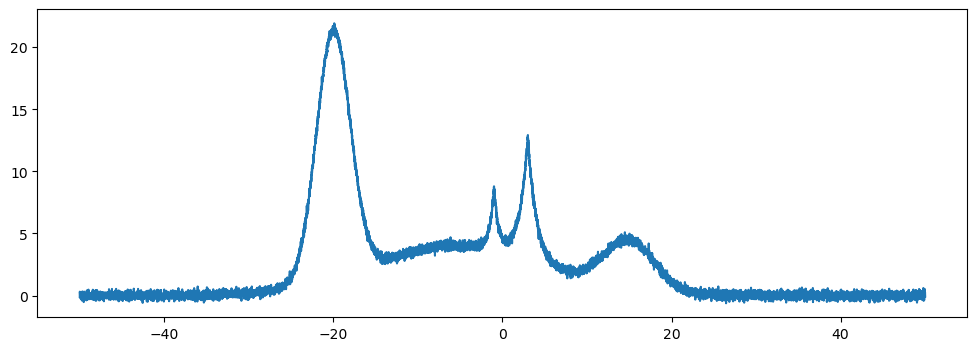

In [7]:
from matplotlib import pyplot as plt

x = np.linspace(-50, 50, 10_000)
parameters = [(20, -20, 2), (4, -5.5, 10), (5, -1, 0.5), (10, 3, 1), (4, 15, 3)]
y = multiple_models(x, params=parameters, model_list=['gaussian'] * 2 + ['laplace'] * 2 + ['gaussian'], noise_level=0.2)

plt.figure(figsize=(12, 4))
plt.plot(x, y)
plt.show()